## Introduction

The Koch snowflake is a mathematical construction similar in spirit to the Serpensky gasket described in Chapter 03.

The idea is to begin with an equilateral triangle and remove the middle third of each side and replace it with two line segments of the same length that go outward. (That is, they have the same length as the segment you just removed.)

You can see that after doing this once you will have produced a little figure made out of 12 segments. In the code
below the number_of_iterations is set equal to $1$ so you can run the cell and see this result.

You could repeat this procedure on each of these twelve segments to produce some smaller bumps. And you could repeat that again and again and again. Let's call these the *iterations* of the procedure. Each time you finish an iteration you have made each of the line segments of your figure a bit longer. You can change the $1$ and re-run the cell to
see this in action below. 

By how much longer is the perimeter of iteration $n+1$ bigger than the perimeter of iteration $n$?

This Koch snowflake is mentioned in the Challenge Problems, chapter 07.

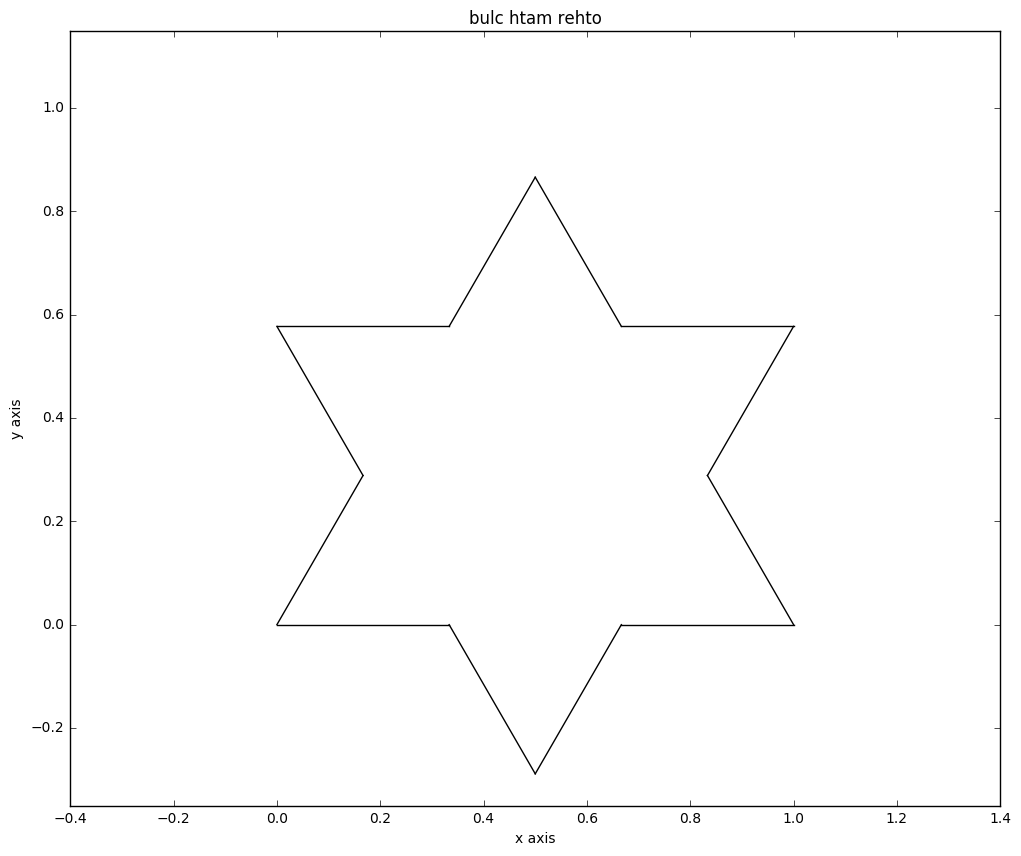

In [3]:
number_of_iterations = 1

# make plots inline (so that they do not pop-out)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
po3 = pi/3.0

# from two listy vectors return b - a
def vecSubtract(b, a):
    vx = b[0]-a[0]
    vy = b[1]-a[1]
    return [vx, vy]

# from v return v of unit length
def vecNorm(v):
    if v[0] == 0. and v[1] == 0.: return 0.
    mag = np.sqrt(v[0]*v[0] + v[1]*v[1])
    return [v[0]/mag, v[1]/mag]

# from v return scaled to length s
def vecScale(v, s):
    return [v[0]*s, v[1]*s]

def newAngleOne(v):
    thisAngle = np.arctan2(v[1], v[0])
    return thisAngle + po3

def newAngleTwo(v):
    thisAngle = np.arctan2(v[1], v[0])
    return thisAngle - 2.0*po3

def vecFromAngleAndLength(angle, length):
    return [length*np.cos(angle), length*np.sin(angle)]

fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')

lower_limit_x = -0.4
upper_limit_x = 1.4
lower_limit_y = -0.5
upper_limit_y = 1.3
ax.set(xlim=(lower_limit_x, upper_limit_x), ylim=(lower_limit_y,upper_limit_y))
ax.set(xlabel='x axis', ylabel = 'y axis', title='bulc htam rehto')

r3 = np.sqrt(3.0)
r2 = np.sqrt(2.0)
p5 = 0.5
r3ot = p5*r3

# x is a list of segments
# x[0] is the first seg, x[0][0] is its first endpoint, x[0][0][0] is the x coord of that endpoint
x = [[[0.0, 0.0], [p5, r3ot]], [[p5, r3ot], [1.0, 0.0]], [[1.0, 0.0], [0.0, 0.0]]]

for n in range(number_of_iterations):
    for s in range(3*int(np.power(4, float(n)))):
        seglen = np.power(1.0/3.0, float(n+1))
        
        # first segment of four
        x0 = x[0][0] # a coordinate
        v1 = vecSubtract(x[0][1], x[0][0])
        v2 = vecNorm(v1)
        v3 = vecScale(v2, seglen)
        x1 = [x[0][0][0]+v3[0], x[0][0][1]+v3[1]]
        x.append([x0,x1])

        # second segment of four
        v4 = vecFromAngleAndLength(newAngleOne(v3), seglen)
        x0 = x1
        x1 = [x0[0]+v4[0], x0[1]+v4[1]]
        x.append([x0, x1])
        
        # third segment of four
        v5 = vecFromAngleAndLength(newAngleTwo(v4), seglen)
        x0 = x1
        x1 = [x0[0]+v5[0], x0[1]+v5[1]]
        x.append([x0,x1])
        
        # fourth segment of four
        v6 = vecFromAngleAndLength(newAngleOne(v5), seglen)
        x0 = x1
        x1 = [x0[0]+v6[0], x0[1]+v6[1]]
        x.append([x0,x1])
    
        del x[0]

    
for a in range(len(x)):
    ax.plot([x[a][0][0], x[a][1][0]], [x[a][0][1], x[a][1][1]], color='k')
    # ax.plot([x, x+dx, x+dx, x, x], [y, y, y+dy, y+dy, y], color='k')

plt.show()
